<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/09b_naive_bayes-digits.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 09b -- Naive Bayes with the digits dataset

Reference: 

* [MNIST digits](https://en.wikipedia.org/wiki/MNIST_database) -- wikipedia
* [Section 5.05 from VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) -- github
* [Let's Try t-SNE](https://observablehq.com/@mbostock/lets-try-t-sne) (Mike Bostock) -- observable

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

# Visualize the data

* MNIST sprites are 28-by-28
* [sklearn digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) are 8-by-8
* [Let's Try t-SNE](https://observablehq.com/@mbostock/lets-try-t-sne) (Mike Bostock) uses the 28-by-28 images

In [5]:
import matplotlib.pyplot as plt

In [6]:
print("digits.images:", digits.images.shape)
digits.images[0]

digits.images: (1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
print("digits.data:", digits.data.shape)
digits.data[0]

digits.data: (1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

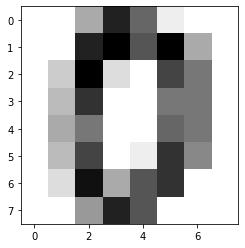

In [8]:
plt.imshow(digits.images[0], cmap='binary')

(64,)
(8, 8)


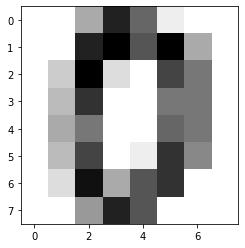

In [9]:
print(digits.data[0].shape)
print(digits.images[0].shape)
plt.imshow(digits.images[0].reshape(8,8), cmap='binary');

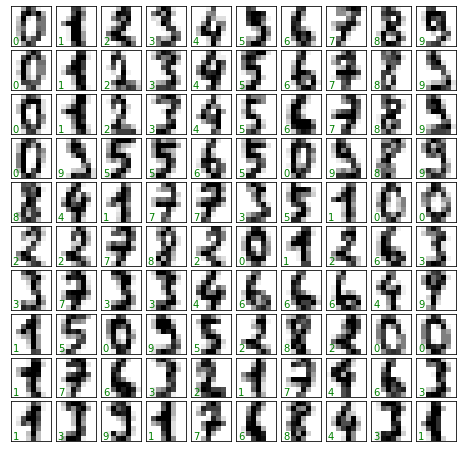

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Classifying digits

In [11]:
# Train/test split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [12]:
# Gaussian naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [13]:
# Assess model performance
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

# Confusion matrix

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch06/images/06_08.png" width="300"/>

[Figure credit:](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb) Raschka -- github

### References 

* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) -- scikit-learn.org
* [matplotlib heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) -- matplotlib.org
* [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) -- seaborn.pydata.org

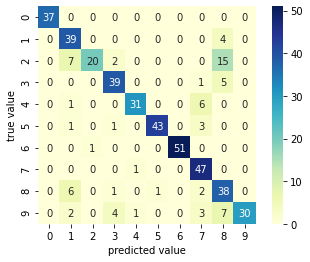

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#sns.set_theme()

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Balanced datasets

Repeat the analysis with balanced train/test datasets



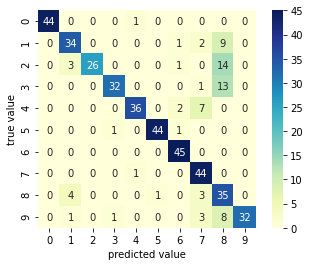

In [19]:
# Balance the datasets with "stratify=target"
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1,
                                                stratify=y)

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cmap="YlGnBu", cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Visualizing performance

Highlight mistakes with red annotation

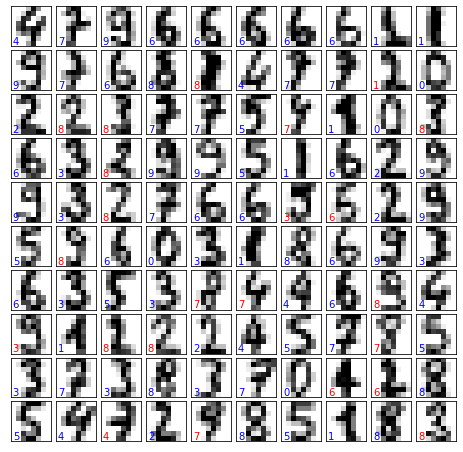

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='blue' if (ytest[i] == y_model[i]) else 'red')